In [2]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import accuracy_score,classification_report

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('/content/Advertising.csv')

In [6]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

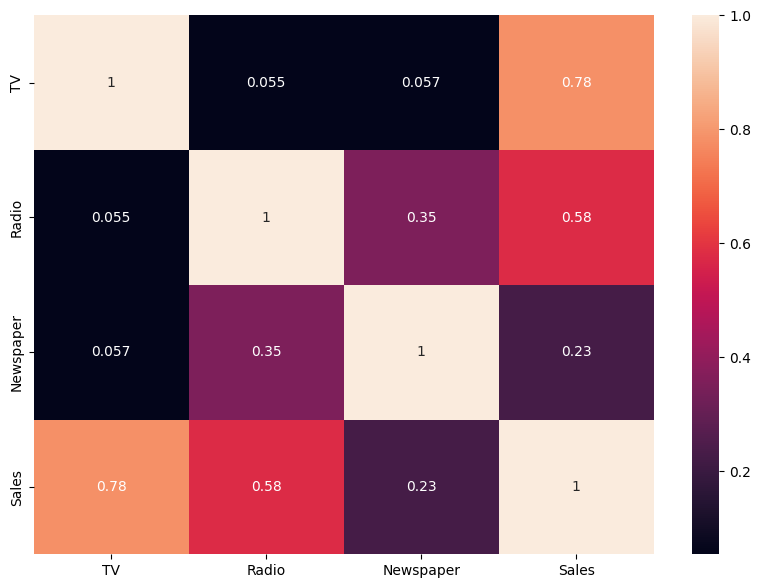

In [11]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)

In [12]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:

from sklearn.metrics import mean_absolute_error

y_pred = model.predict(X_train)




In [29]:
from sklearn.metrics import mean_absolute_error
y_mean = y_train.mean()

y_pred_baseline = [y_mean] * len(y_test)
mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
print(mae_baseline)
mean_traini = mean_absolute_error(y_train, y_pred)
print(mean_traini)
test_mae =  mean_absolute_error(y_test, model.predict(X_test))
print(test_mae)

4.454428989095983
1.1984678961500137
0.0


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Mean Squared Error: 3.17
Root Mean Squared Error: 1.78
R-squared: 0.90


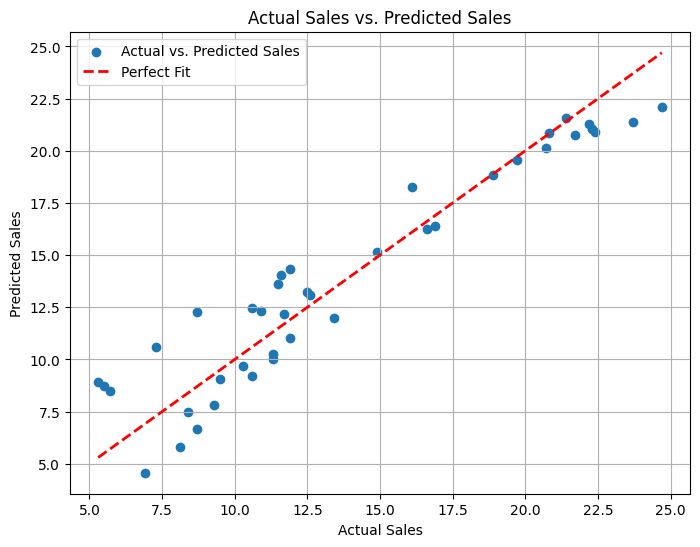

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Actual vs. Predicted Sales')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

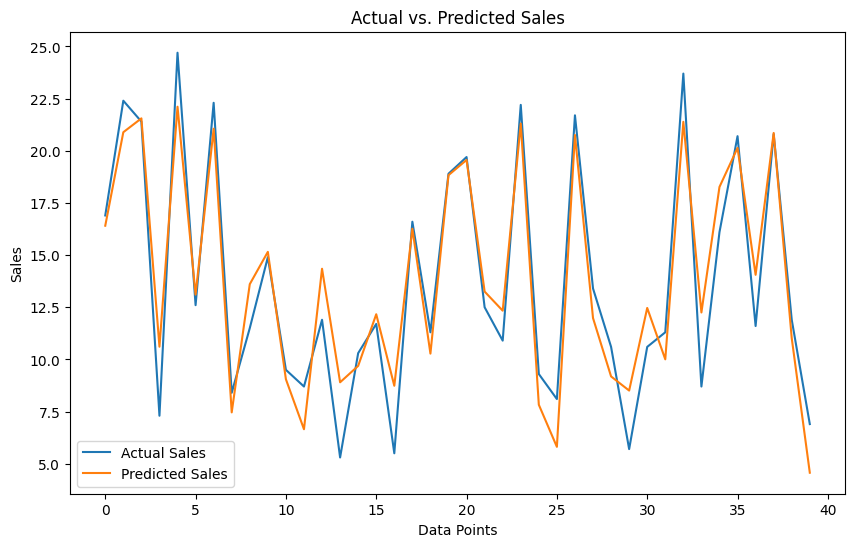

In [ ]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred, label='Predicted Sales')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()


In [ ]:
print(model.intercept_)
print(model.coef_)

2.979067338122629
[0.04472952 0.18919505 0.00276111]


In [34]:


intercept = model.intercept_
coefficients = model.coef_

print("Sales = ", end="")
print(intercept, end="")

for i in range(len(coefficients)):
  print(" + ", end="")
  print(coefficients[i], end="")
  print(" * ", end="")
  if i == 0:
    print("TV", end="")
  elif i == 1:
    print("Radio", end="")
  else:
    print("Newspaper", end="")



Sales = 2.979067338122629 + 0.044729517468716326 * TV + 0.18919505423437652 * Radio + 0.0027611143413671935 * Newspaper

Decision Tree - Mean Absolute Error: 0.99
Decision Tree - Mean Squared Error: 2.17
Decision Tree - Root Mean Squared Error: 1.47
Decision Tree - R-squared: 0.93


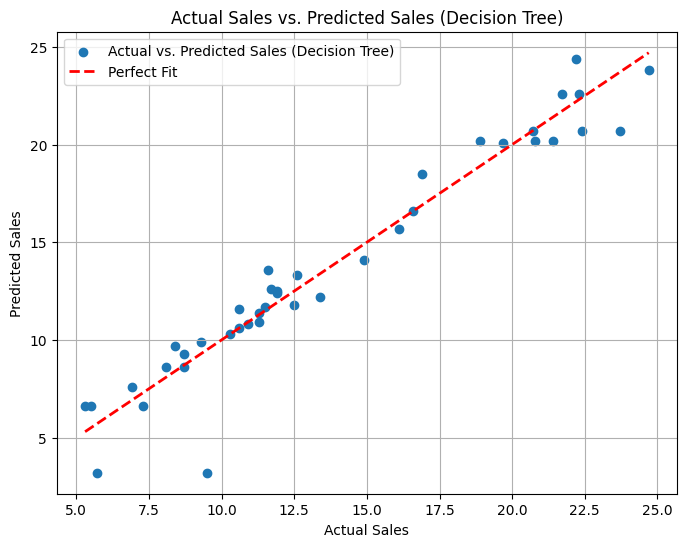

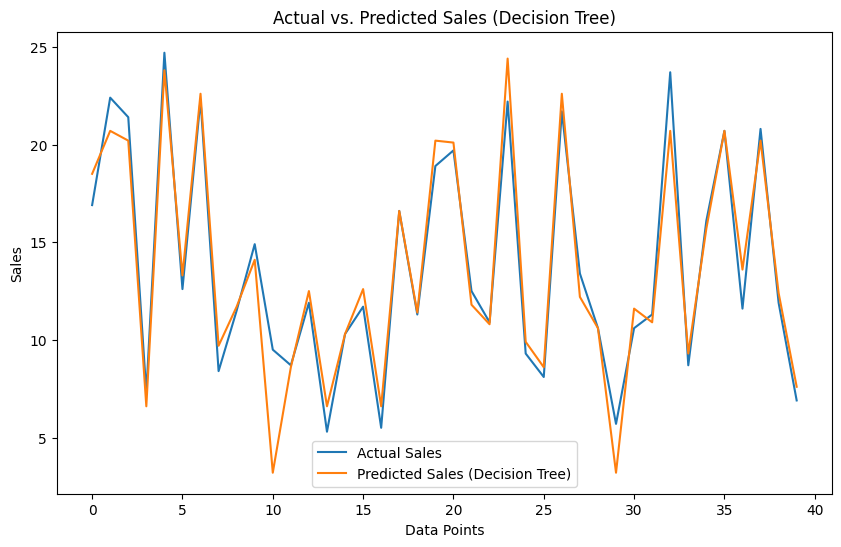

In [ ]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor


tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)


y_pred_tree = tree_model.predict(X_test)


mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree - Mean Absolute Error: {mae_tree:.2f}")
print(f"Decision Tree - Mean Squared Error: {mse_tree:.2f}")
print(f"Decision Tree - Root Mean Squared Error: {rmse_tree:.2f}")
print(f"Decision Tree - R-squared: {r2_tree:.2f}")

# Plot actual vs predicted sales for Decision Tree
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tree, label='Actual vs. Predicted Sales (Decision Tree)')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Fit')
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual Sales vs. Predicted Sales (Decision Tree)")
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales')
plt.plot(y_pred_tree, label='Predicted Sales (Decision Tree)')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.title('Actual vs. Predicted Sales (Decision Tree)')
plt.legend()
plt.show()


In [ ]:
act_predict=pd.DataFrame({
    'Actual':y_test.values.flatten(),
    'Predict':y_pred_tree.flatten()
})
act_predict.head(20)

,Actual,Predict
0,16.9,18.5
1,22.4,20.7
2,21.4,20.2
3,7.3,6.6
4,24.7,23.8
5,12.6,13.3
6,22.3,22.6
7,8.4,9.7
8,11.5,11.7
9,14.9,14.1
